In [2]:
import joblib
import bs4
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [91]:
def get_sp500_sector():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    res = requests.get(url, timeout=10)
    soup = BeautifulSoup(res.text, "html.parser")
    table = soup.find(name="table", attrs={"id": "constituents"}).find(name="tbody")

    sp500_list = []
    for row in table.find_all(name="tr")[1:]:
        symbol = row.find_all("td")[0].find("a").text.replace("\n", "")
        company = row.find_all("td")[1].find("a").text.replace("\n", "")
        sector = row.find_all("td")[3].text.replace("\n", "")
        sub_industry = row.find_all("td")[4].text
        sp500_list.append([symbol, company, sector, sub_industry])
    df = pd.DataFrame(sp500_list, columns=["ticker", "company", "sector", "sub_industry"])
    return df

df = get_sp500_sector()

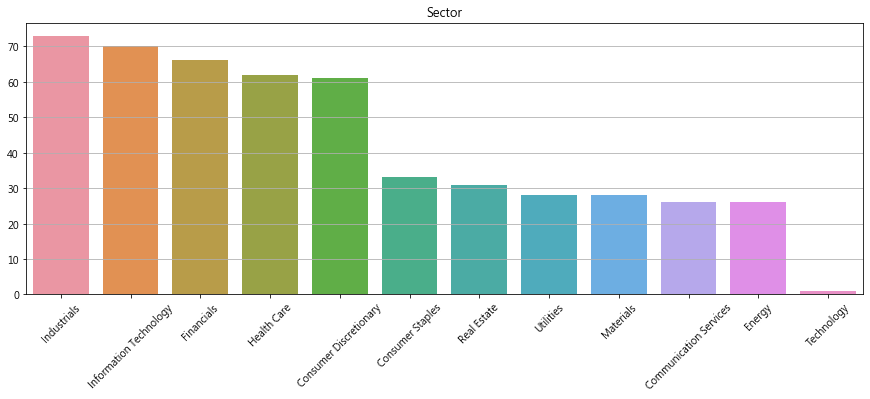

In [92]:
plt.figure(figsize=(15, 5))
sns.countplot(df.sector, order=df.sector.value_counts().index)
plt.title("Sector")
plt.xticks(rotation=45)
plt.xlabel(None)
plt.ylabel(None)
plt.grid(axis="y")
plt.show()

In [98]:
ticker_dict = dict()
for index, row in df.iterrows():
    ticker_dict[row["ticker"]] = row["sector"]

In [104]:
ticker_dict

{'MMM': 'Industrials',
 'ABT': 'Health Care',
 'ABBV': 'Health Care',
 'ABMD': 'Health Care',
 'ACN': 'Information Technology',
 'ATVI': 'Communication Services',
 'ADBE': 'Information Technology',
 'AMD': 'Information Technology',
 'AAP': 'Consumer Discretionary',
 'AES': 'Utilities',
 'AFL': 'Financials',
 'A': 'Health Care',
 'APD': 'Materials',
 'AKAM': 'Information Technology',
 'ALK': 'Industrials',
 'ALB': 'Materials',
 'ARE': 'Real Estate',
 'ALXN': 'Health Care',
 'ALGN': 'Health Care',
 'ALLE': 'Industrials',
 'LNT': 'Utilities',
 'ALL': 'Financials',
 'GOOGL': 'Communication Services',
 'GOOG': 'Communication Services',
 'MO': 'Consumer Staples',
 'AMZN': 'Consumer Discretionary',
 'AMCR': 'Materials',
 'AEE': 'Utilities',
 'AAL': 'Industrials',
 'AEP': 'Utilities',
 'AXP': 'Financials',
 'AIG': 'Financials',
 'AMT': 'Real Estate',
 'AWK': 'Utilities',
 'AMP': 'Financials',
 'ABC': 'Health Care',
 'AME': 'Industrials',
 'AMGN': 'Health Care',
 'APH': 'Information Technology'

In [110]:
train_data = joblib.load("../data/train_top10_v2.bin")
valid_data = joblib.load("../data/valid_top10_v2.bin")
test_data = joblib.load("../data/test_top10_v2.bin")

In [111]:
for index, row in train_data.iterrows():
    train_data.loc[index, "sector"] = ticker_dict.get(row["ticker"])
for index, row in valid_data.iterrows():
    valid_data.loc[index, "sector"] = ticker_dict.get(row["ticker"])
for index, row in test_data.iterrows():
    test_data.loc[index, "sector"] = ticker_dict.get(row["ticker"])

In [112]:
joblib.dump(train_data, "../data/train_top10_v3.bin", compress=5)
joblib.dump(valid_data, "../data/valid_top10_v3.bin", compress=5)
joblib.dump(test_data, "../data/test_top10_v3.bin", compress=5)

['../data/test_top10_v3.bin']